In [6]:
import uproot

In [23]:
traindata_qcd = uproot.open("Data/2018-04-29-wz3lnu-powheg-WZxsec2016-3MediumLeptonsNoVetoToWselection-v1/skim-ed3d461a4db43003ec5b84aa79b51ac0.root")
traindata_ew = uproot.open("Data/2018-04-29-wlljj-ewk-WZxsec2016-3MediumLeptonsNoVetoToWselection-v1/skim-dc1e0bb8be4e72b890a589fcd43127d4.root")

In [24]:
train_ew_emm = traindata_ew["emm"]["ntuple"]
train_ewframe_emm = train_ew_emm.pandas.df(["Mass", "mjj", "ePt", "m1Pt", "m2Pt"])
train_qcd_emm = traindata_qcd["emm"]["ntuple"]
train_qcdframe_emm = train_qcd_emm.pandas.df(["Mass", "mjj", "ePt", "m1Pt", "m2Pt"])

In [33]:
train_ewframe_emm = train_ewframe_emm[train_ewframe_emm["mjj"]>100]
train_ewframe_emm["isSignal"] = 1
train_qcdframe_emm = train_qcdframe_emm[train_qcdframe_emm["mjj"]>100]
train_qcdframe_emm["isSignal"] = 0
print(train_qcdframe_emm)
print(train_ewframe_emm)

             Mass          mjj        ePt        m1Pt       m2Pt  isSignal
entry                                                                     
4      147.264038   332.124359  23.001898   65.523987  53.019188         0
15     205.972809   140.590454  40.687618   85.717812  64.840401         0
19     165.746826   427.765991  52.059391   70.461761  45.802940         0
21     221.640411   116.514404  61.825382  209.748001  31.917673         0
24     173.499359   780.812622  34.268398   60.492981  42.486507         0
...           ...          ...        ...         ...        ...       ...
2238   149.483597  2720.599609  46.162487  158.445679  28.287703         0
2241   192.937454   407.194275  40.375122   78.619743  20.840229         0
2245   132.238022   121.424286  26.454046   51.421230  38.410023         0
2257   144.270065   255.374557  92.161888   68.549202  51.246517         0
2260   120.516914   424.608917  27.790937   97.195793  42.394020         0

[386 rows x 6 columns]
 

In [36]:
import pandas
train_emm = pandas.concat([train_ewframe_emm,train_qcdframe_emm])
train_emm

,Mass,mjj,ePt,m1Pt,m2Pt,isSignal
entry,,,,,,
0,140.262024,2903.871582,21.469595,120.051598,20.740955,1
1,230.447418,1086.802246,51.176846,43.499329,40.832218,1
3,331.813293,607.694702,88.261200,181.941208,68.676140,1
4,211.881607,1162.837036,91.500999,79.324493,25.061037,1
5,120.463028,138.688171,26.481632,88.261650,47.582901,1
...,...,...,...,...,...,...
2238,149.483597,2720.599609,46.162487,158.445679,28.287703,0
2241,192.937454,407.194275,40.375122,78.619743,20.840229,0
2245,132.238022,121.424286,26.454046,51.421230,38.410023,0


In [21]:
import xgboost as xgb

In [66]:
target = train_emm["isSignal"]
train = train_emm.drop(["isSignal"], axis=1)

In [67]:
mod = xgb.XGBRegressor(
    gamma=1,                 
    learning_rate=0.01,
    max_depth=3,
    n_estimators=10000,                                                                    
    subsample=0.8,
    random_state=34
)

In [69]:
mod.fit(train, target)

[23:45:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=1,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=10000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=34,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.8, verbosity=1)

In [73]:
test_qcd = uproot.open("2018-04-29-wz3lnu-powheg-WZxsec2016-3MediumLeptonsNoVetoToWselection-v1/skim-b931afe5b58e05ef586f7591e9342b2a.root")
test_qcd_emm = test_qcd["emm"]["ntuple"]
test_qcdframe_emm = test_qcd_emm.pandas.df(["Mass", "mjj", "ePt", "m1Pt", "m2Pt"])
test_qcdframe_emm = test_qcdframe_emm[test_qcdframe_emm["mjj"]>100]

In [85]:
test_ew = uproot.open("2018-04-29-wlljj-ewk-WZxsec2016-3MediumLeptonsNoVetoToWselection-v1/skim-90b187551c9ca8e622d48716c12d8cb8.root")
test_ew_emm = test_ew["emm"]["ntuple"]
test_ewframe_emm = test_ew_emm.pandas.df(["Mass", "mjj", "ePt", "m1Pt", "m2Pt"])
test_ewframe_emm = test_ewframe_emm[test_ewframe_emm["mjj"]>100]

In [79]:
predictions_qcd = mod.predict(test_qcdframe_emm)

In [86]:
predictions_ew = mod.predict(test_ewframe_emm)

In [83]:
import matplotlib.pyplot as plt

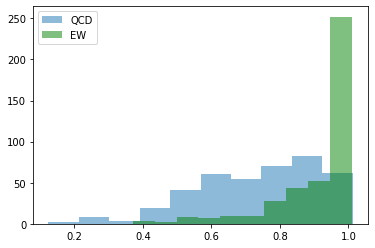

In [92]:
plt.hist(predictions_qcd,alpha=0.5,label='QCD')
plt.hist(predictions_ew,color='g', alpha=0.5,label='EW')
plt.legend()

In [97]:
from sklearn.metrics import roc_auc_score
testew_emm_wtruth = test_ewframe_emm.copy()
testew_emm_wtruth["isSignal"] = 1
testqcd_emm_wtruth = test_qcdframe_emm.copy()
testqcd_emm_wtruth["isSignal"] = 0

In [120]:
test_values = pandas.concat([testqcd_emm_wtruth[["isSignal"]],testew_emm_wtruth[["isSignal"]]])
test_data = pandas.concat([test_qcdframe_emm, test_ewframe_emm])

In [123]:
testew_emm_wtruth["prediction"] = predictions_ew
testqcd_emm_wtruth["prediction"] = predictions_qcd

In [147]:
print("Rate of acceptance")
acc_sig = testew_emm_wtruth[testew_emm_wtruth["prediction"] > 0.9]
infile_sig = train_ew_emm.pandas.df(["genWeight"])
acc_bkgd = testqcd_emm_wtruth[testqcd_emm_wtruth["prediction"] > 0.9]
infile_bkgd = train_qcd_emm.pandas.df(["genWeight"])
acc_rate_sig = len(acc_sig)/len(infile_sig)
acc_rate_bkgd = len(acc_bkgd)/len(infile_bkgd)
print("Signal", acc_rate_sig)
print("Background", acc_rate_bkgd)

Rate of acceptance
Signal 0.07745541655576257
Background 0.03437637725870427


In [150]:
print("Scaled by cross section")
print("Signal", acc_rate_bkgd*17.5)

Scaled by cross section
Signal 0.6015866020273247


,genWeight
entry,
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
2264,1.0
2265,1.0
2266,1.0
